# Loan Data Approval Notebook

## Objectives
- The client wants to grasp the trends within their customer base to figure out which variables are most closely correlated to getting a loan approved.

## Inputs
- 'output/loan_data.csv'

## Outputs
- create a study that can be used to build the Streamlit Dashboard
- This study analyzes correlations between loan attributes and approval status, visually represented through heat maps and scatterplots, aiming to enhance loan approval processes.

## Conclusion
- 

## Change Working Directory

The notebooks are stored in a subfolder, therefore when running the notebook in the editor, we need to change the working directory from its current folder to its parent folder

We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\Bartek\\Desktop\\Predictive-Analysis\\jupyter_notebooks'

- We use os.path.dirname() to get the parent directory
- Then we call the os.chir() function, which defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\Bartek\\Desktop\\Predictive-Analysis'

# Load Data

In [5]:
import pandas as pd
loan_data = pd.read_csv("outputs/loan_data.csv")
loan_data = loan_data.drop(['Loan_ID'] , axis=1)

# Data Exploration
We aim to become better acquainted with the dataset by examining the types and distribution of variables, identifying missing data, and understanding the significance of these variables in a business context.

In [6]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=loan_data)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Correlation Study
We use .corr() for the spearman and pearson method, and sort the correlations in descending order.For each variable we remove missing data and zeros and calculate the correlation coefficient between the variable and the sale price. We store it in a list and convert the list to a Pandas Series.

In [6]:
loan_data['Loan_Status'] = loan_data['Loan_Status'].map({'Y': 1, 'N': 0})
numerical_columns = loan_data.select_dtypes(include=['float', 'int']).columns
corr_spearman = loan_data[numerical_columns].corr(method='spearman')['Loan_Status'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

Credit_History       0.618937
CoapplicantIncome    0.124820
LoanAmount           0.055227
Loan_Amount_Term    -0.048417
ApplicantIncome     -0.032439
Name: Loan_Status, dtype: float64

We have recived both strong and weak correlations between the Loan_Status and the given variables. You should generally use strong levels of correlation, but as it is not possible in this case we will go for the top 4 strongly correlated virables.

In [7]:
import_variables = set(corr_spearman[:3].index.to_list() + corr_spearman[:3].index.to_list())
import_variables

{'CoapplicantIncome', 'Credit_History', 'LoanAmount'}

## Categorical Bar Chart
Plot bar charts for all the object fields in the database displaying the proportions of each variable accordingly.

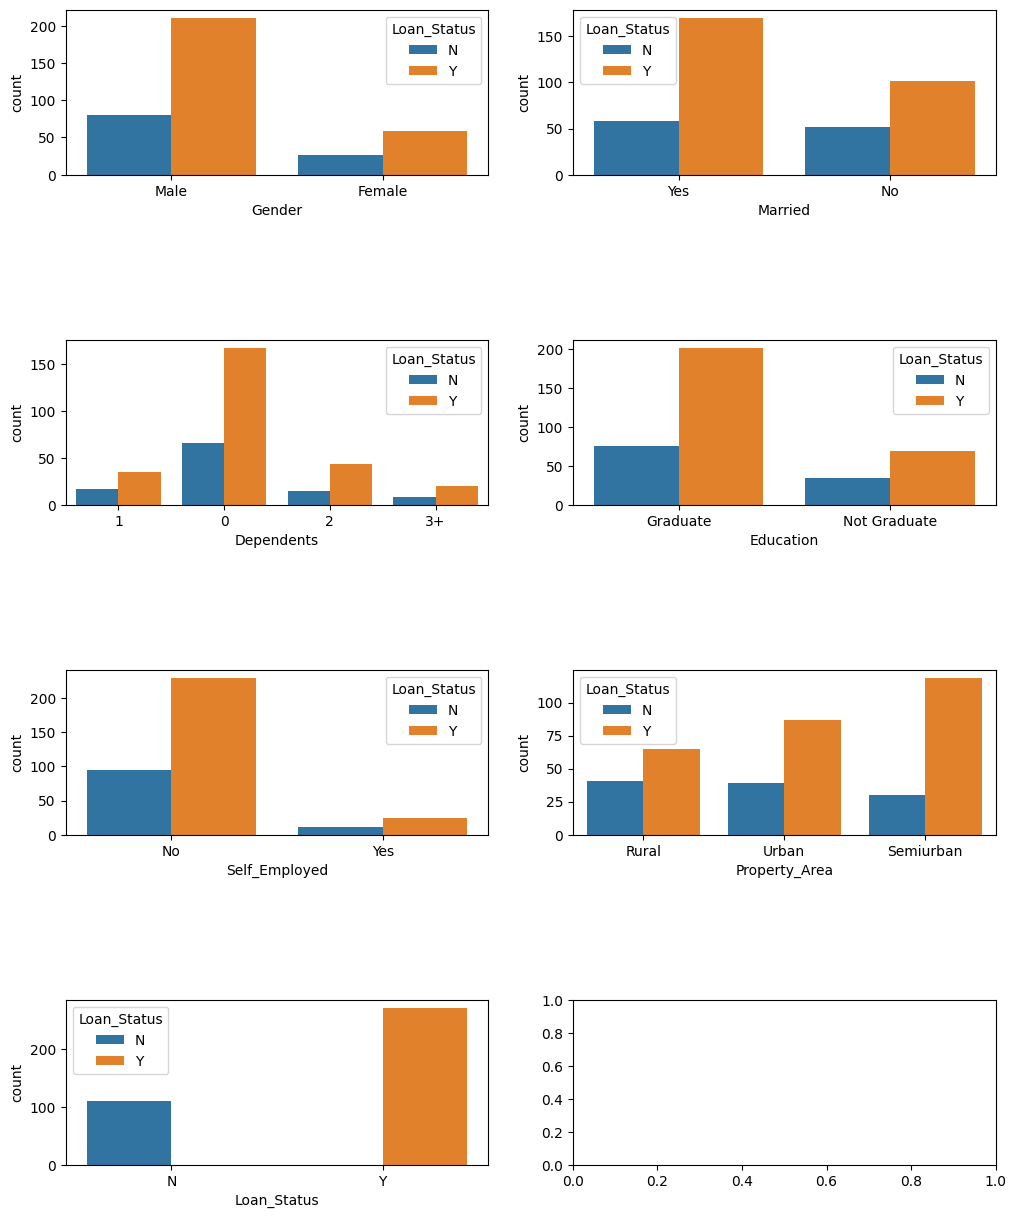

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

loan_data_raw = pd.read_csv("inputs/datasets/raw/loan_data.csv").drop(['Loan_ID'] , axis=1)
cat_num = loan_data_raw.select_dtypes(include=['object']).columns.to_list()
fig, ax = plt.subplots(4, 2, figsize=(12,15))


for index, cat_col in enumerate(cat_num):
    row, col = index//2, index%2
    sns.countplot(x=cat_col, data=loan_data_raw, hue='Loan_Status', ax=ax[row, col])

plt.subplots_adjust(hspace=1)


## Numerical Acceptance Study

Study how loan acceptance is based or correlated with each numerical value to see if there are any patterns based on high or low Credit score.

c:\Users\Bartek\Desktop\Predictive-Analysis\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Bartek\Desktop\Predictive-Analysis\.venv\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Bartek\Desktop\Predictive-Analysis\.venv\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Bartek\Desktop\Predictiv

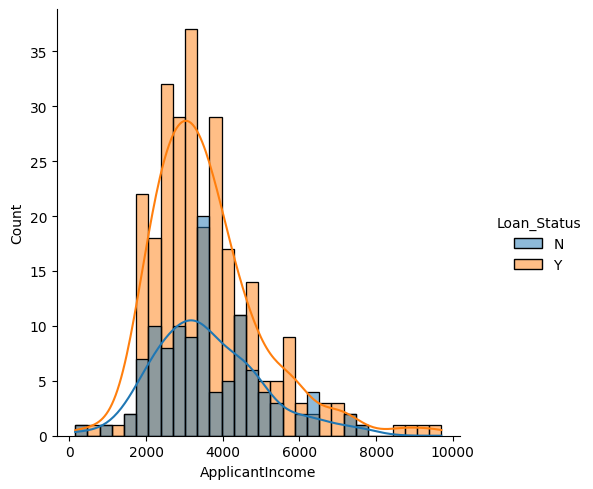

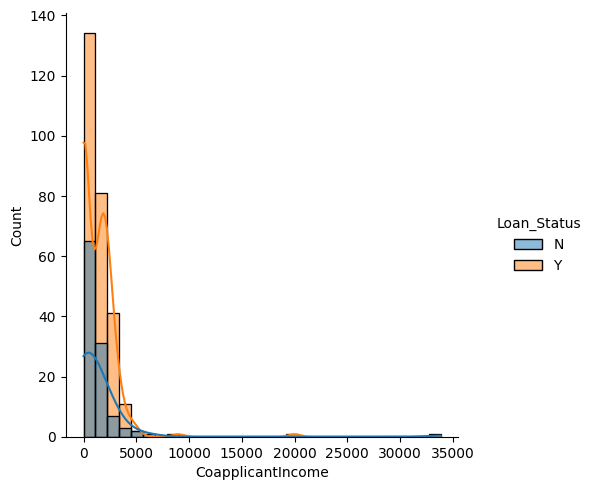

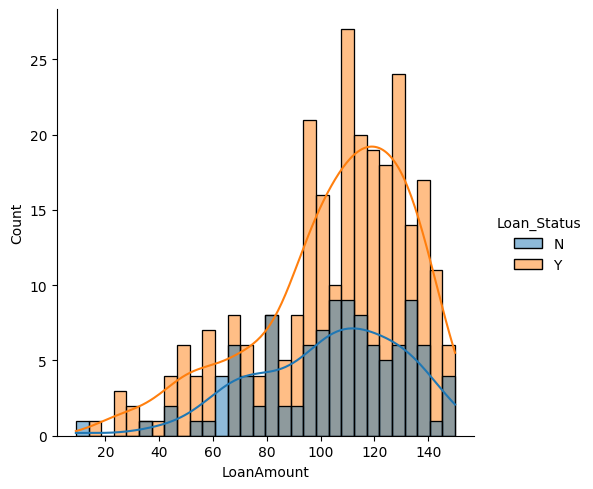

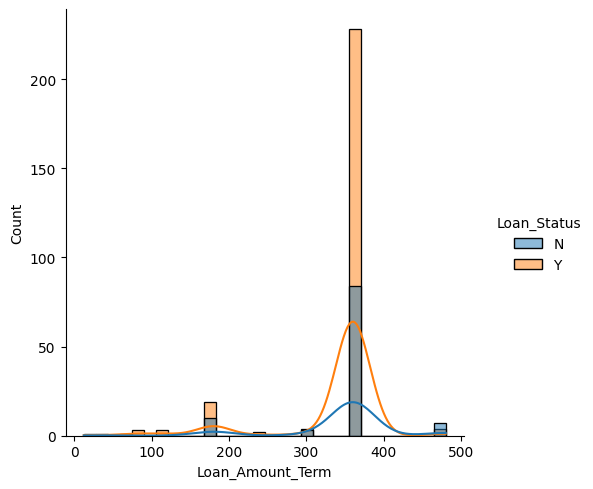

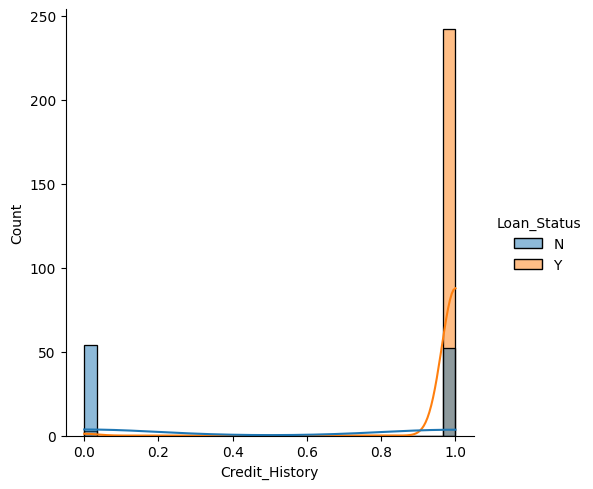

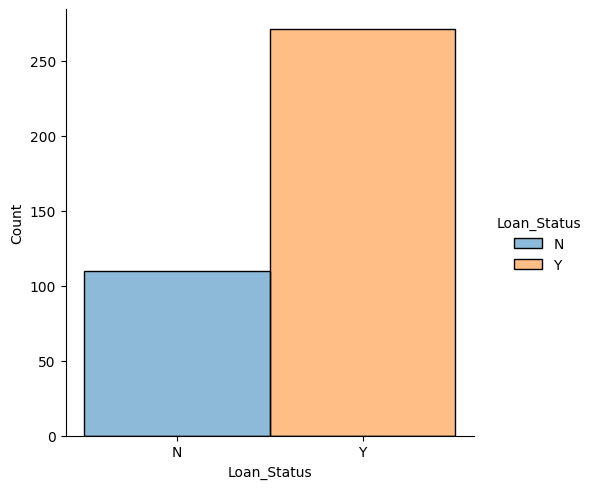

In [ ]:
import seaborn as sns
for col in loan_data.select_dtypes(['float', 'int']):
    sns.displot(x=col, data=loan_data_raw, hue='Loan_Status', kde=True, bins=30)

From looking at the data I have noticed that there is a significantly more accepted loan requests than non approved once which could potentially lead to over fitting the model towards approving most applications. This can be fixed with a 

## Conclusions and Next steps
The correlations and plots interpretation converge.
- An accepted customer has a credit score
- A higher income increases your chance of approval
- Customers income has an impact on the approval rate
- Loan amount has low correlation with acceptance rates